# MNIST with Neural Networks

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

2024-12-12 15:34:22.677082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
from sklearn.model_selection import train_test_split

# separate X_train_full into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=25)

In [9]:
# check the shapes for X_train, X_validation, X_test

print(f"X_train: {X_train.shape} \n X_validation: {X_validation.shape} \n X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} \n y_validation: {y_validation} \n y_test: {y_test.shape}")

X_train: (48000, 28, 28) 
 X_validation: (12000, 28, 28) 
 X_test: (10000, 28, 28)
y_train: (48000,) 
 y_validation: [9 7 8 ... 3 7 4] 
 y_test: (10000,)


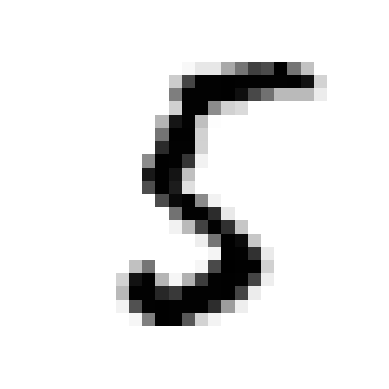

In [12]:
# plot a few digits
import matplotlib.pyplot as plt

plt.imshow(X_train[45], cmap="binary")
plt.axis('off')
plt.show()

In [41]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [42]:
# Create a normalisation layer
normalisation_layer = tf.keras.layers.Normalization(axis=-1)
normalisation_layer.adapt(X_train)  # Compute the mean and variance from the training data

model = tf.keras.models.Sequential([
    normalisation_layer,
    tf.keras.layers.Flatten(input_shape=[28,28]), # receives input data and converts it to 1d array
    tf.keras.layers.Dense(300, activation="relu"), # dense layer with 300 neurons
    tf.keras.layers.Dense(100, activation="relu"), # second dense layer with 100 neurons
    tf.keras.layers.Dense(10, activation="softmax") #output layer, with 10 nodes, as 10 classes, softmax because multiclass
])

# implement early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,  #determines how many epochs will run before early stopping
                                                     restore_best_weights=True)

# implement TensorBoard
tensorboard_cb = tf.keras.callbacks.TensorBoard("mnist_board")

# implement checkpoint to keep only the best model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mnist_model.keras", save_best_only=True)


#implement optmiser
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)


# compile the model
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])

history = model.fit(X_train,y_train, 
    validation_data=(X_validation, y_validation), epochs=100,
    callbacks=[early_stopping_cb, tensorboard_cb, checkpoint_cb])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5129 - loss: 1.6373 - val_accuracy: 0.8461 - val_loss: 0.6173
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8580 - loss: 0.5435 - val_accuracy: 0.8869 - val_loss: 0.4265
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8927 - loss: 0.3939 - val_accuracy: 0.9043 - val_loss: 0.3587
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9068 - loss: 0.3332 - val_accuracy: 0.9129 - val_loss: 0.3222
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9164 - loss: 0.2978 - val_accuracy: 0.9187 - val_loss: 0.2982
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9231 - loss: 0.2731 - val_accuracy: 0.9222 - val_loss: 0.2806
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9275 - loss: 0.2543 - val_accuracy: 0.9264 - val_loss: 0.2668
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9315 - loss: 

In [43]:
# restore best model
model = tf.keras.models.load_model("mnist_model.keras")

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1148


[0.10299555957317352, 0.9682000279426575]